In [12]:
%autosave 100
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('a1_voc_resp.mat')
est_data = data['est_data']

data = loadmat('a1_voc_specgram.mat')
sg = data['sg']

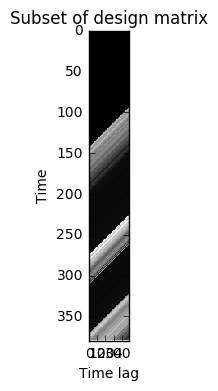

In [11]:
T = 380*40
d = 100
X = np.zeros([T,d])

for Stimulus_ID in range(40):

    Taux = 380
    
    for i in range(d):        
        specgram = sg[0][0][0][:,:, Stimulus_ID]
        Stimulus = np.sum(specgram,axis=0)

        AuxStim = Stimulus[0:Taux-i]
        X[380*Stimulus_ID + i:380*Stimulus_ID + Taux,d-1-i] = AuxStim

Subsection = X[0:380,0:50]
plt.figure()
plt.imshow(Subsection, interpolation='none',cmap='gray')
plt.title('Subset of design matrix')
plt.xlabel('Time lag')
plt.ylabel('Time')
plt.show()

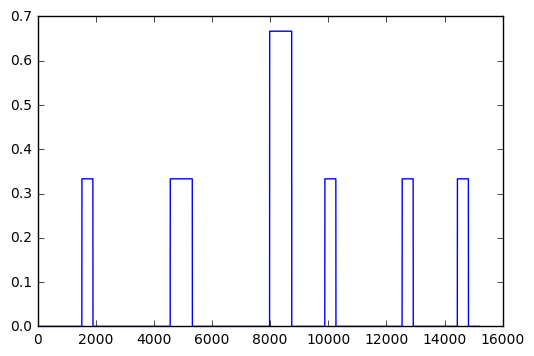

In [27]:
Neuron_ID = 167
Y = np.zeros((380*40,1))
for Stimulus_ID in range(40):
    PSTH = est_data[0,Neuron_ID][2][:,Stimulus_ID] # sampled in 100 Hz
    
    Y[Stimulus_ID*380:Stimulus_ID*380 + 380] = PSTH[0]
        
Y = Y[:,np.newaxis]


plt.plot(Y[:,0])
plt.show()